<a href="https://colab.research.google.com/github/airosa32/Data_Science__Case_02/blob/main/Case_2_Biblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import's e visualização basica para entender sobre os dados**

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
vendas = pd.read_excel("/content/drive/MyDrive/DNC - Cursos/4 Curso Ciencias de Dados/0 Iniciando na Analise de Dados/Case 02/varejo.xlsx")


vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


In [ ]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# **Renomeando coluna's APP para Aplicativo...**

In [ ]:
vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
APP             139
Aplicativo    21425
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas["idcanalvenda"] = vendas["idcanalvenda"].str.replace("APP", "Aplicativo")


vendas.groupby("idcanalvenda").idcompra.nunique()

idcanalvenda
Aplicativo    21539
Internet      24515
Mobile        24732
Name: idcompra, dtype: int64

In [ ]:
vendas["Nome_Departamento"] = vendas["Nome_Departamento"].str.replace(" ", "_")


vendas.groupby("Nome_Departamento").idcompra.nunique()

Nome_Departamento
Acessorios_e_Inovacoes     3548
Alimentos                     2
Ar_e_Ventilacao             951
Audio                      1794
Automotivo                  895
Bebes                      4531
Beleza_e_Saude             4626
Brinquedos                 1320
Cama,_Mesa_e_Banho          153
Casa_e_Construcao           263
Cine_e_Foto                  11
Decoracao                   134
Eletrodomesticos          10501
Eletroportateis            9593
Esporte_e_Lazer             531
Ferramentas                1111
Games                       764
Informatica                5290
Instrumentos_Musicais         1
Linha_Industrial             86
Malas_e_Mochilas            114
Moda                          3
Moveis                     4175
Perfumaria                  624
Pet_Shop                     43
Produtos_de_Limpeza         713
Relogios                    134
TV_e_Video                    5
TVs_e_Acessorios           5326
Tablets                    1770
Telefones_e_Celulares 

# **Tratamento de Nulos 1**

In [ ]:
# Vendo se contem dados nulos no Dataset
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Vendo os dados nulos do ESTADO e preenchendo com NaN para visualizarmos com mais facilidade
vendas[vendas["estado"].isnull()]

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
96,382380,Internet,A,2023-04-26,NaN,879.200,Telefones_e_Celulares,NaN,5804
284,346055,Internet,A,2023-03-23,NaN,87.648,Ar_e_Ventilacao,NaN,16359
402,172555,Mobile,A,2023-03-19,NaN,135.840,Ar_e_Ventilacao,NaN,13691
411,446380,Mobile,A,2023-03-09,NaN,1703.120,Eletrodomesticos,NaN,13024
770,40425,Mobile,B,2023-04-21,NaN,1759.200,Telefones_e_Celulares,NaN,9121
...,...,...,...,...,...,...,...,...,...
78610,399680,Aplicativo,A,2023-04-19,NaN,339.912,Eletroportateis,NaN,20873
78718,320895,Mobile,B,2023-01-20,NaN,1000.800,Telefones_e_Celulares,NaN,17772
79465,389240,Aplicativo,A,2023-01-14,NaN,279.200,Eletrodomesticos,NaN,20399
79548,124585,Mobile,A,2023-04-21,NaN,2051.240,TVs_e_Acessorios,NaN,17784


In [ ]:
## Dropando todos os dados nulos do Dataset
vendas_sem_nulos = vendas.dropna()


vendas_sem_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79926 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           79926 non-null  int64         
 1   idcanalvenda       79926 non-null  object        
 2   bandeira           79926 non-null  object        
 3   Data               79926 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    79926 non-null  float64       
 6   Nome_Departamento  79926 non-null  object        
 7   estado             79926 non-null  object        
 8   cliente_Log        79926 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 6.1+ MB


# **Tratamento de Nulos 2**

In [ ]:
# De vez dropar todos os dados nulos, vamos preencher os dados nulos do ESTADO com o "MS", mas o preço ainda tera dados nulos
vendas["estado"].fillna("MS", inplace=True)


vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              79926 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


In [ ]:
# Vamos preencher os dados nulos do PREÇO utilizando uma metrica de: substituir os nulos com o valor da media de todos os preços
media_preco = vendas["Preço"].mean() # agg("mean")

vendas["Preço"].fillna(media_preco, inplace=True)


vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80228 entries, 0 to 80227
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   idcompra           80228 non-null  int64         
 1   idcanalvenda       80228 non-null  object        
 2   bandeira           80228 non-null  object        
 3   Data               80228 non-null  datetime64[ns]
 4   Preço              80228 non-null  float64       
 5   Preço_com_frete    80228 non-null  float64       
 6   Nome_Departamento  80228 non-null  object        
 7   estado             80228 non-null  object        
 8   cliente_Log        80228 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# **Filtrando os Dados**

In [ ]:
# Preço não pode ser maior que o Preço_com_frete
vendas[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,80228.000000,80228.000000
mean,906.589129,908.619823
std,1057.611490,1057.583101
min,6.320000,6.320000
25%,147.920000,150.706000
50%,532.448000,535.120000
75%,1199.200000,1215.240000
max,14439.240000,14439.240000


In [ ]:
# Preço não pode ser maior que o Preço_com_frete
vendas_tratado = vendas.query("Preço < Preço_com_frete")


vendas_tratado[["Preço", "Preço_com_frete"]].describe()

,Preço,Preço_com_frete
count,22047.000000,22047.000000
mean,549.518401,567.332688
std,846.295127,863.458763
min,8.720000,9.512000
25%,93.528000,100.800000
50%,183.200000,193.912000
75%,661.680000,676.736000
max,14391.200000,14407.120000


In [ ]:
# Nome_Departamento que sejá "Esporte_e_Lazer" e sejá do Estado de "SP"
vendas_tratado.query("Nome_Departamento == 'Esporte_e_Lazer' and estado == 'SP'").describe()

,idcompra,Data,Preço,Preço_com_frete,cliente_Log
count,168.000000,168,168.000000,168.00000,168.000000
mean,265130.744048,2023-03-05 23:51:25.714285824,1070.083095,1098.71319,14368.571429
min,2145.000000,2023-01-02 00:00:00,10.896000,16.11200,210.000000
25%,157955.000000,2023-02-03 18:00:00,527.200000,545.32000,7717.500000
50%,253702.500000,2023-03-07 00:00:00,1108.008000,1136.24800,15281.000000
75%,380616.250000,2023-04-09 00:00:00,1599.200000,1618.88400,20538.000000
max,496910.000000,2023-04-30 00:00:00,2399.200000,2432.74400,27837.000000
std,140435.252208,NaN,617.138494,620.66244,7890.233136


In [ ]:
# Departamentos mais vendidos - Agrupa Nome_Departamento pelo idcompra, apenas os não repetidos e ordena do maior para o menor
vendas_tratado.groupby("Nome_Departamento").idcompra.nunique().sort_values(ascending=False).reset_index()

,Nome_Departamento,idcompra
0,Bebes,4353
1,Eletrodomesticos,4201
2,Eletroportateis,2223
3,Moveis,2036
4,Utilidades_Domesticas,1366
5,Acessorios_e_Inovacoes,1243
6,Beleza_e_Saude,1054
7,Brinquedos,686
8,Perfumaria,563
9,Produtos_de_Limpeza,522


In [ ]:
# Media de Preço_com_frete por Nome_Departamento - Agrupa Nome_Departamento pelo Preço_com_frete, ordena do maior para o menor e tira a sua média com duas casas decimais
round(vendas_tratado.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19
5,Eletrodomesticos,1400.66
6,Esporte_e_Lazer,1123.14
7,Tablets,1100.23
8,Games,942.90
9,Instrumentos_Musicais,834.61


In [ ]:
# Quantidade de vendas por data
vendas_por_data = vendas_tratado.groupby("Data").idcompra.nunique().reset_index()


vendas_por_data.head()

,Data,idcompra
0,2023-01-02,193
1,2023-01-03,163
2,2023-01-04,188
3,2023-01-05,204
4,2023-01-06,198


In [73]:
# Quantidade de vendas por mes
vendas_tratado["Mes"] = vendas_tratado["Data"].dt.month


vendas_tratado.groupby("Mes")["idcompra"].nunique().sort_values(ascending=False).reset_index()

,Mes,idcompra
0,3,5590
1,4,5454
2,1,5309
3,2,5138


# **Realizando o Join - vendas JOIN clientes, pelo idcompra**

In [ ]:
# 2 Base de dados / Tabela
clientes = pd.read_excel("/content/drive/MyDrive/DNC - Cursos/4 Curso Ciencias de Dados/0 Iniciando na Analise de Dados/Case 02/cliente_varejo.xlsx")


clientes.head()

,cliente_Log,idade,renda
0,15042,89,11337
1,17590,54,2050
2,15478,47,8258
3,2933,39,4671
4,19790,26,9207


In [ ]:
# Entendendo os dados
clientes[["idade", "renda"]].describe()

,idade,renda
count,26425.000000,26425.000000
mean,53.412564,8241.470350
std,20.698825,3899.871482
min,18.000000,1500.000000
25%,35.000000,4859.000000
50%,53.000000,8234.000000
75%,71.000000,11629.000000
max,89.000000,15000.000000


In [ ]:
# Vendo se temos dados nulos
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente_Log  26425 non-null  int64
 1   idade        26425 non-null  int64
 2   renda        26425 non-null  int64
dtypes: int64(3)
memory usage: 619.5 KB


In [ ]:
# Mudando o tipo do dado "renda" para "float"
clientes = clientes.astype({"renda" : "float"})
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26425 entries, 0 to 26424
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cliente_Log  26425 non-null  int64  
 1   idade        26425 non-null  int64  
 2   renda        26425 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 619.5 KB


In [ ]:
# Filtro: SELECT v*, c.idade, c.renda FROM vendas as v LEFT JOIN clientes as c ON vendas.cliente_Log = clientes.cliente_Log
vendas_clientes = vendas_tratado.merge(clientes, how="left", on="cliente_Log")


vendas_clientes.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log,Mes,idade,renda
0,437305,Mobile,A,2023-03-06,35.92,37.512,Bebes,SP,15478,3,47,8258.0
1,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,26,9207.0
2,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,58,9204.0
3,455795,Mobile,B,2023-03-31,1743.20,1785.112,Esporte_e_Lazer,RS,19790,3,48,2796.0
4,75525,Mobile,B,2023-02-19,679.20,695.120,Moveis,SP,3442,2,78,6596.0


# **Agrupamentos**

In [ ]:
agrupamento_idcanal_renda = round(vendas_clientes.groupby("idcanalvenda").renda.agg("mean").sort_values(ascending=False).reset_index(), 2)


agrupamento_idcanal_renda.head()

,idcanalvenda,renda
0,Aplicativo,8244.85
1,Mobile,8222.72
2,Internet,8211.84


In [ ]:
agrupamento_idade_bandeiras = round(vendas_clientes.groupby("bandeira").idade.mean().sort_values(ascending=False).reset_index(), 2)


agrupamento_idade_bandeiras.head()

,bandeira,idade
0,A,53.30
1,B,53.29


In [ ]:
agrupamento_departamento_preco = round(vendas_tratado.groupby("Nome_Departamento")["Preço_com_frete"].agg("mean").sort_values(ascending=False).reset_index(), 2)


agrupamento_departamento_preco.head()

,Nome_Departamento,Preço_com_frete
0,TVs_e_Acessorios,3469.38
1,Informatica,2159.78
2,Linha_Industrial,2027.11
3,Cine_e_Foto,1851.20
4,Telefones_e_Celulares,1442.19


# **Gráficos**

In [ ]:
import matplotlib.pyplot as plt

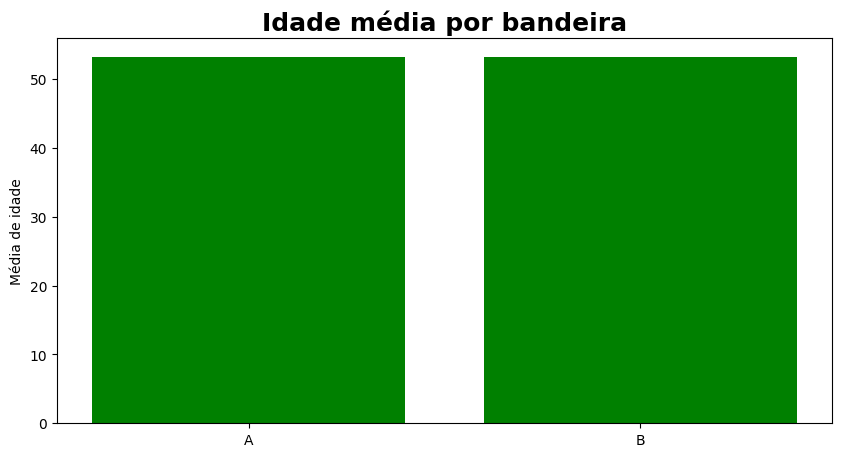

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(agrupamento_idade_bandeiras["bandeira"], agrupamento_idade_bandeiras["idade"], color="green")


plt.ylabel("Média de idade")
plt.title("Idade média por bandeira", loc="center", fontsize=18, fontweight="bold", color="black");

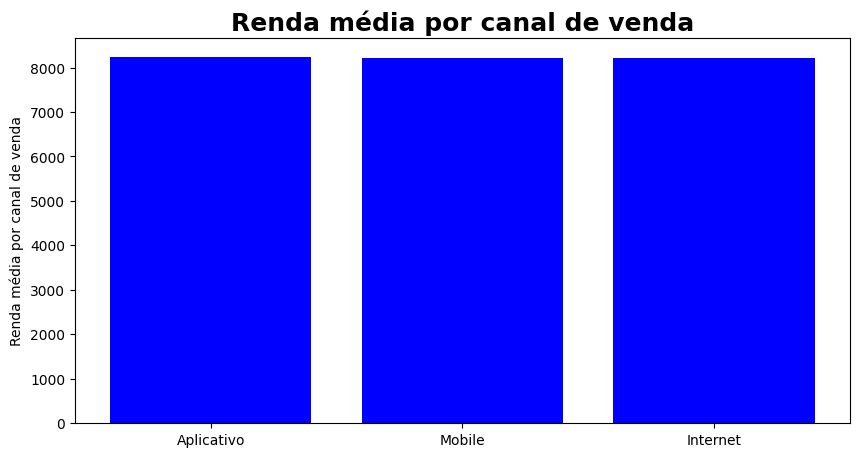

In [ ]:
fig = plt.figure(figsize = (10, 5))
plt.bar(agrupamento_idcanal_renda["idcanalvenda"], agrupamento_idcanal_renda["renda"], color="BLUE")


plt.ylabel("Renda média por canal de venda")
plt.title("Renda média por canal de venda", loc="center", fontsize=18, fontweight="bold", color="black");

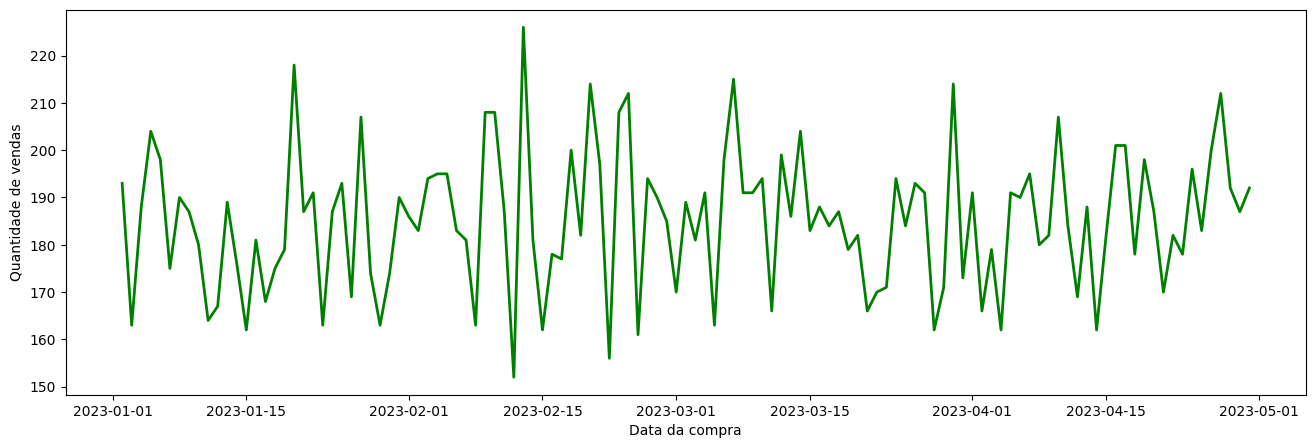

In [ ]:
fig = plt.figure(figsize = (16, 5))
plt.plot(vendas_por_data["Data"], vendas_por_data["idcompra"], color="green", linewidth = 2)


plt.xlabel("Data da compra")
plt.ylabel("Quantidade de vendas");

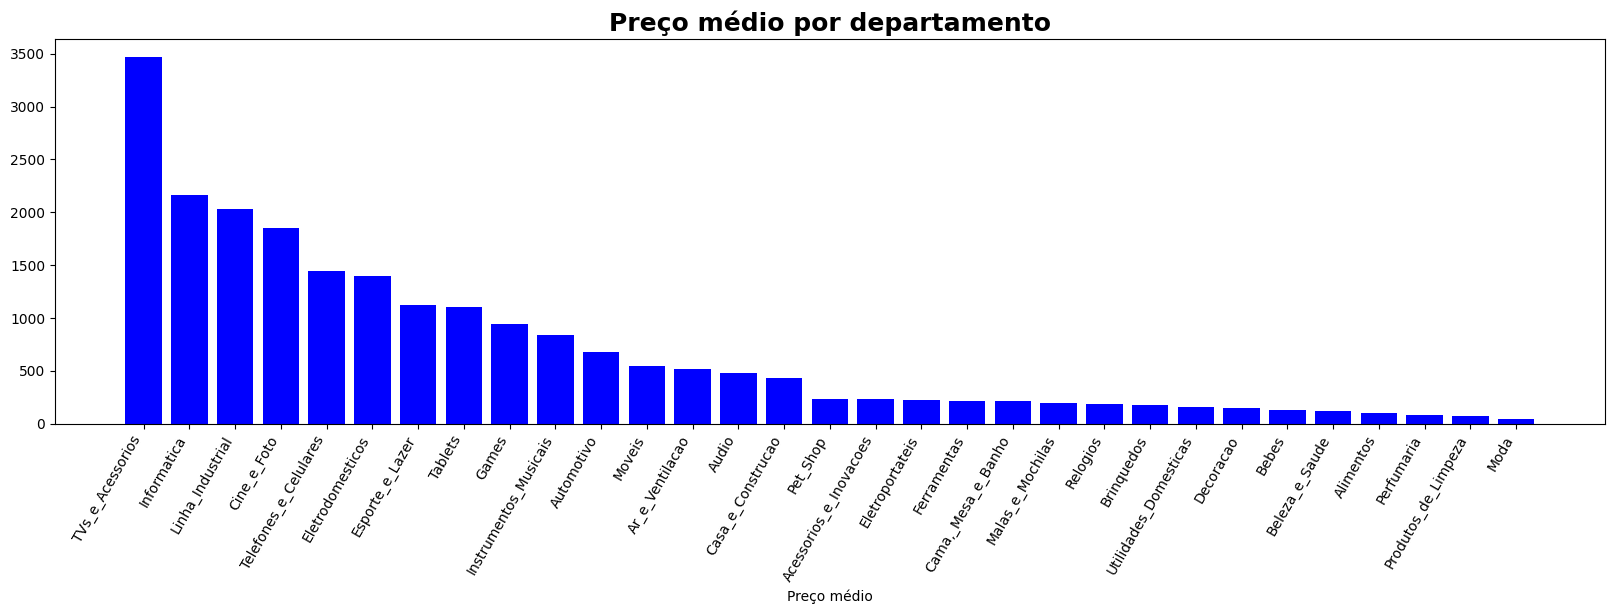

In [ ]:
fig = plt.figure(figsize = (20, 5))
plt.bar(agrupamento_departamento_preco["Nome_Departamento"], agrupamento_departamento_preco["Preço_com_frete"], color="blue")


plt.xlabel("Preço médio")
plt.xticks(rotation = 60, ha="right")
plt.title("Preço médio por departamento", loc="center", fontsize=18, fontweight="bold", color="black");

# **Fazendo uso de bibliotecas mais robusta, para uso de gerações de graficos**

In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [78]:
import chart_studio.plotly as py
import cufflinks as cs


import plotly.express as px
import plotly.graph_objects as go

In [79]:
px.bar(agrupamento_idade_bandeiras, x = "bandeira", y = "idade")

In [80]:
px.line(vendas_por_data, x = "Data", y = "idcompra")

In [81]:
px.bar(agrupamento_departamento_preco, x = "Nome_Departamento", y = "Preço_com_frete")